<a href="https://colab.research.google.com/github/jeaneigsi/Humain-/blob/main/PaddleOcr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VPS 8-12 Gb RAM cpu only : **Possible de la deployer sur mobile en cours de test: Essayer la solution** [**ici**](https://huggingface.co/spaces/Loren/Streamlit_OCR_comparator)
Contexte : Mettre au point une solutions de reconnaissance d'images   

**Défis** : Minimiser les coûts, efficacité de saltion à prioriser.

**Choix Technologiques** : Nous étions parti sur l'utilisation des VLM (Vison Language Model) comme Phi3 de microsoft pour réaliser la tâche. Cépendant malgré son efficacité, ce modele demande une carte graphique + Cpu de memore ram d'envirion 10 GB. Après analyse des solutions existantes comme vous lemontre les phtos suivantes. Les coûts d'une telle infractsructures sur le projet, rendait impossible sa mise en production ! Il fallait trouver une alternative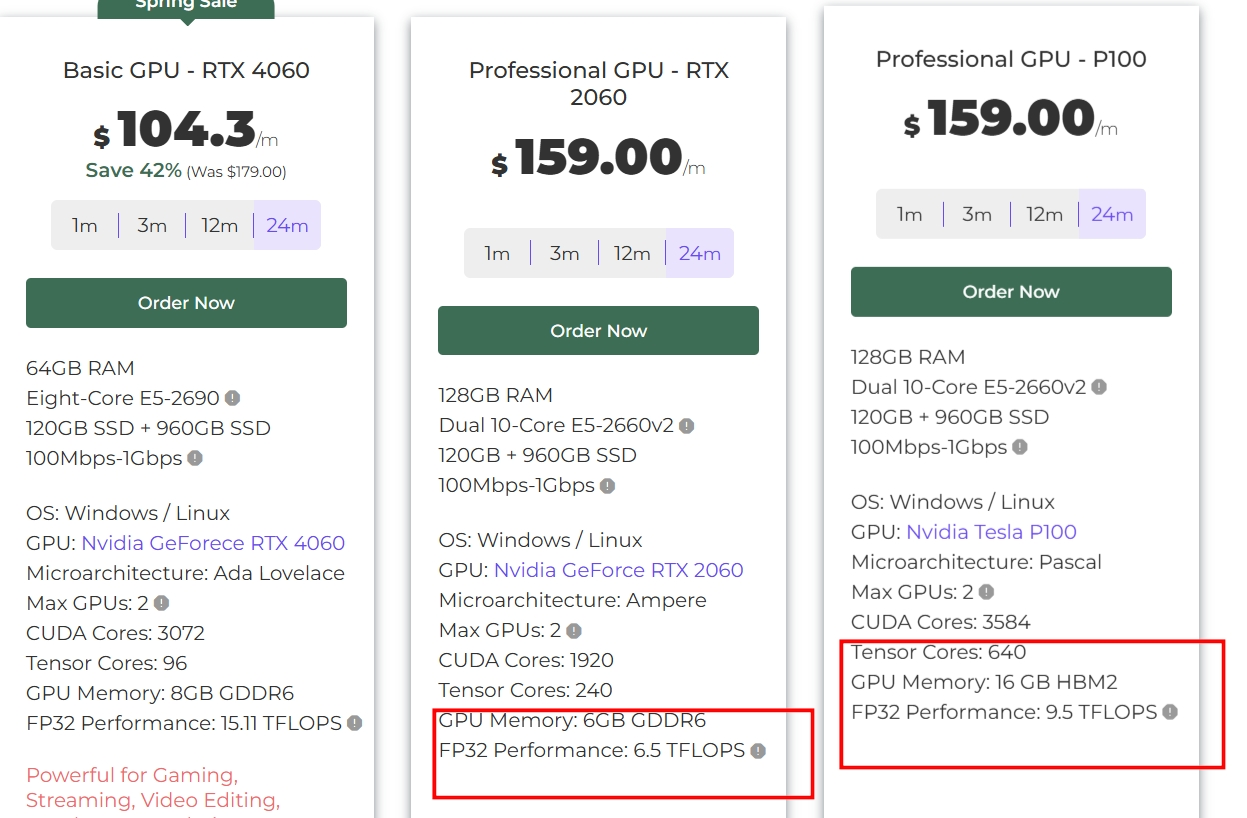

Alors j'ai trouvé une solution moins couteuse , et plus salable: **OCR+LLM**  
Grace à l'OCR ,une simple carte intel sans GPu est largent suffisante pour reconnaitre les caractères sur une images. Le prix est donc dratisquement dimunié. Pour augmenter la précision, j'ai eu l'idée de la couplé avec un LLM qui si il y a des caracteres manquants ou mal identifié par OCR peut retrouvé le texte d'origine le plus probable a partir des quelques mots de contexte. Et ca **marche** !  solution OCR simple pour voir son efficacité [ici](https://huggingface.co/spaces/Loren/Streamlit_OCR_comparator)
# Test d'inference de sa solution OCR

Vous pouvez accéder a la demos et faire des testes à partir de [ici](https://huggingface.co/spaces/Loren/Streamlit_OCR_comparator)

In [ ]:
!python3 -m pip install paddlepaddle -i https://mirror.baidu.com/pypi/simple #on cpu
# https://learnopencv.com/optical-character-recognition-using-paddleocr/
# !git clone https://github.com/PaddlePaddle/PaddleOCR.git


In [ ]:
# !pip install paddlepaddle-gpu
!pip install paddleocr
from paddleocr import PaddleOCR,draw_ocr

# from paddleocr import PaddleOCR,draw_ocr
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
ocr = PaddleOCR(use_angle_cls=True,lang="en",use_gpu=False)

In [5]:
ocr.args

Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='/usr/local/lib/python3.10/dist-pack

In [41]:
img_path="./test2.jpg"
result = ocr.ocr(img_path)


[2024/05/29 12:36:49] ppocr DEBUG: dt_boxes num : 78, elapsed : 0.07513546943664551
[2024/05/29 12:36:50] ppocr DEBUG: cls num  : 78, elapsed : 0.08760881423950195
[2024/05/29 12:36:50] ppocr DEBUG: rec_res num  : 78, elapsed : 0.32790517807006836


In [32]:
import cv2
import os
import matplotlib.pyplot as plt


def save_ocr(img_path, out_path, result, font):
    # Ensure the output directory exists
    os.makedirs(out_path, exist_ok=True)

    # Extract the image filename without the extension
    filename = os.path.splitext(os.path.basename(img_path))[0]

    # Define the save path with a valid image extension
    save_path = os.path.join(out_path, f"{filename}_ocr_output.png")

    image = cv2.imread(img_path)
    if image is None:
        raise FileNotFoundError(f"Could not read the image from {img_path}")

    # Unpack the OCR result
    result = result[0]


    boxes = [line[0] for line in result]
    txts = [line[1][0] for line in result]
    scores = [line[1][1] for line in result]

    # Draw the OCR results on the image
    im_show = draw_ocr(image, boxes, txts, scores, font_path=font)

    # Save the resulting image
    success = cv2.imwrite(save_path, im_show)
    if not success:
        raise IOError(f"Could not write the image to {save_path}")

    # Convert the image to RGB for displaying with matplotlib
    img = cv2.cvtColor(im_show, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()

    print(f"OCR results saved to {save_path},all texts is {final_text}")



In [9]:
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
# Specifying output path and font path.
out_path = './output_images'
font = './simfang.ttf'
img_path = 'test2.jpg'
result = ocr.ocr(img_path)

save_ocr(img_path, out_path, result, font)

In [45]:
result[0]
txts = [line[1][0] for line in result[0]] #list
final_output=' '.join(txts) #string
final_output

"DEPARTMENT'S COPY Ecobank FLEASE SEUE ECOSANK SURKINA TELEX TRANSER 49.R dn Fhotelde ie 018.P.145Ouagadougou5 MANAGERS CHECK Burkina Faso BY CASH ORAFT VALUE-DATE Esptce OTER TRANSFER VALUE DATE BY ADORESS/A The Sum of COY Amount EUROS SCCOUNTN AT/N de Comote EFICARylANK  Bangue Beneliciaire 022350t080600051044284 NomAdresse  PMNO CODESANQU CODE GUICHE RIB Scolaritr LonsPe Bawbte RECEPTIGNNE DETAEs.OEMotf de paiement DETACUNT0575501-9 267FE2024 Rate/ Contre aleur Visa..e...y DosCompteN Agence Principale Fois Dobr Compte N Com.fix NAME OFAPPLICANT Autres com. ADDRESS/Adres Com.cheque t0209206 Telex T.V.A. For myaccountan nsk and subject to the conditions outlined on the reserse wicti have reacand understood. Piease effect the transaction detailled above Cel ordre de p est soumis aux conditions stipulees au verso TOTAL which Teller Should Receive C.F.A SIGNATURE N20806 FOR BANK USE ONLY Transaction N Transaction Type lnput Clerk Authorizer Commission code Charges code"

# **Service deployment based on PaddleServing sur Serveur**


In [ ]:
!apt-get remove python
!sudo apt-get install python3.9 -y

In [21]:
!python3.9 --version

Python 3.9.19


In [ ]:
!pip3 install paddlehub==2.1.0 --upgrade

In [3]:
!git clone https://github.com/PaddlePaddle/PaddleOCR.git

Cloning into 'PaddleOCR'...
remote: Enumerating objects: 49542, done.
remote: Counting objects: 100% (768/768), done.
remote: Compressing objects: 100% (497/497), done.
remote: Total 49542 (delta 264), reused 695 (delta 240), pack-reused 48774
Receiving objects: 100% (49542/49542), 346.75 MiB | 34.28 MiB/s, done.
Resolving deltas: 100% (34652/34652), done.
Updating files: 100% (1811/1811), done.


In [4]:
%cd PaddleOCR

/content/PaddleOCR


In [5]:
!hub serving start -m ocr_system

Traceback (most recent call last):
  File "/usr/local/bin/hub", line 5, in <module>
    from paddlehub.commands.utils import execute
  File "/usr/local/lib/python3.10/dist-packages/paddlehub/__init__.py", line 18, in <module>
    import paddle
ModuleNotFoundError: No module named 'paddle'


In [3]:
!apt update
!apt install -y make

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
53 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
m

In [ ]:
!pip3 install paddlepaddle==2.3.0

In [6]:
!python3 -m paddle_serving_server.serve check


/usr/bin/python3: Error while finding module specification for 'paddle_serving_server.serve' (ModuleNotFoundError: No module named 'paddle_serving_server')


# **Next Step** : Code L 'Api et Mode d'emploi du déploiement serveur complement : simple VPS